## **Project Name** - Sales Prediction Using Python

##### Project Type - Prediction 
##### Name - Aryan Patel 
##### Task - 5
##### Github Respo - https://github.com/aryanap11/OIBSIP
#### Project Description - 

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

In [176]:
import numpy as np
import pandas as pd

##  **1) READ DATASET**

In [177]:
df= pd.read_csv("Advertising.csv")
df2= pd.read_csv("Advertising.csv")

In [178]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [179]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


##  **2) DATASET ANALYSIS**

In [180]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [181]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [182]:
# Get size of dataset
df.size

1000

In [183]:
# Get (rows,columns)
df.shape

(200, 5)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [185]:
#Get number of duplicate rows
df.duplicated().sum()

0

In [186]:
# Get number of null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [187]:
#Get statistical summary of dataset(numeric values)
df.describe().round(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.022
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


### Conclusion about the dataset 


* The dataset contains advertising spending across TV, Radio, Newspaper and the corresponding sales. 
* There are 200 rows and 5 columns in the data.
* Column names : 'Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'
* No duplicate rows present in dataset.
* No Null values present in dataset.

## **3) DATA TRANSFORMATION**

In [188]:
# Removing the 'Unnamed: 0' column as it's of no use
df=df.drop(['Unnamed: 0'], axis=1)

In [189]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## **4) DATA VISUALIZATION**

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

####  3.1 - Boxplot

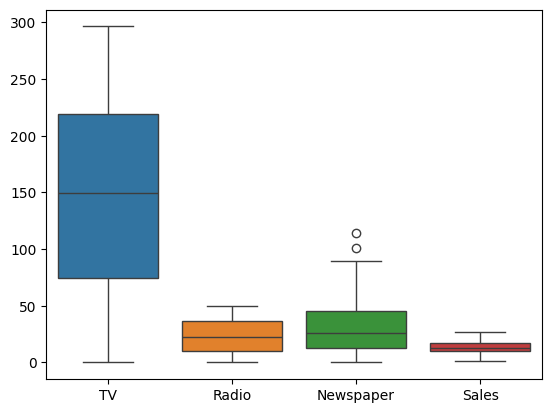

In [191]:
# Boxplot to see outliers
sns.boxplot(df)
plt.show()

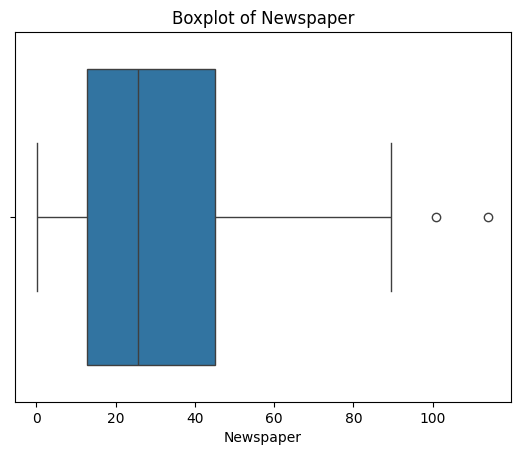

In [192]:
sns.boxplot(x=df['Newspaper'])
plt.title('Boxplot of Newspaper')
plt.show()


**Findings:** As we can see there are outliers in 'Newspaper' so we'll remove them

In [193]:
#Removing outliers
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]
print(outliers)

df_clean = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [194]:
df_clean

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [195]:
df_clean.shape

(198, 4)

In [196]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


#### 3.2 - Correlation Heatmap

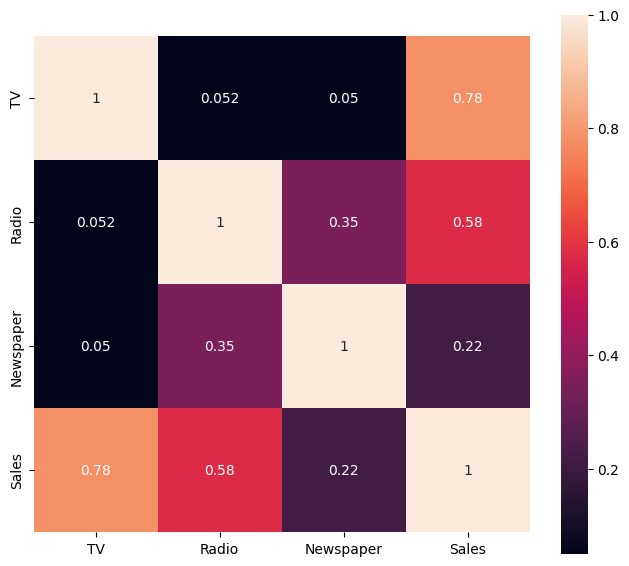

In [197]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df_clean.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corrmat,annot=True , square=True)
plt.show()

#### Insights/conclusion form corelation chart

* From the correlation matrix, we can see  that Newspaper has a much weaker correlation with Sales compared to TV and Radio.

* TV and Radio have stronger correlations with Sales (0.779 , 0.577) compared to Newspaper (0.220).

so for the training of model TV and Radio will be important features as they have significant impact on Sales.


#### 3.3 - Relationship between each independent variable and the dependent variable

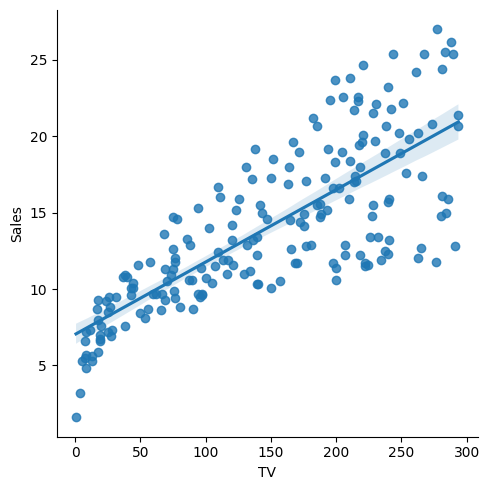

In [215]:
# tv vs sales
sns.lmplot(x='TV', y='Sales', data=df_clean)

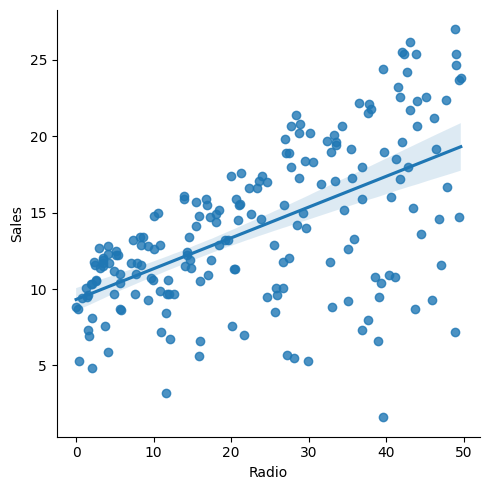

In [216]:
# radio vs sales 
sns.lmplot(x='Radio', y='Sales', data=df_clean)

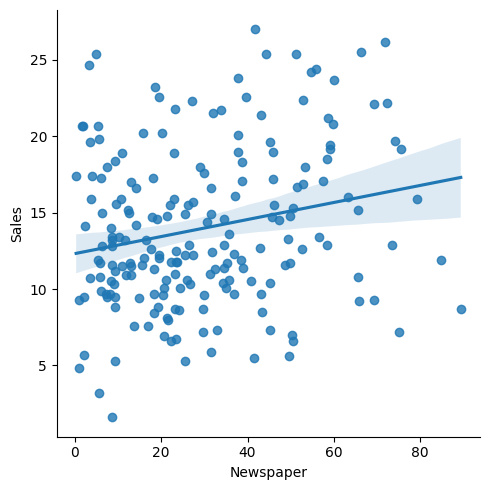

In [217]:
# newspaper vs sales 
sns.lmplot(x='Newspaper',y= 'Sales', data=df_clean)

 ## **4) ML MODEL TRAINING**

In [199]:
# with tv radio and newspaper
x = df_clean[['TV','Radio','Newspaper']]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [200]:
# Target
y=df_clean['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

##### We have **Features :** df_tr, df_trn **Target :** df_taget   

### Splitting The Data Into Test And Train Data

In [201]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


### Train the model

In [202]:
# Train the model

X_train , X_test , y_train , y_test  = train_test_split(x, y, test_size=0.2, random_state=0)

model  = LinearRegression()
model.fit(X_train , y_train )


LinearRegression()

### Prediction

In [203]:
y_pred  = model .predict(X_test )
y_pred

array([14.01074388,  7.32660883, 16.91029923, 12.10494494, 10.32680801,
       15.800589  , 12.86917345, 14.46182171, 10.88622651, 16.12070585,
       22.89188978,  4.44772138, 14.47452338, 15.16779294, 13.08219004,
       11.93756336,  7.38163825, 11.34017618,  9.97074394, 17.25257133,
       20.92597453,  9.48506413,  8.89608111, 12.37384205,  9.35819552,
       16.12716079, 12.20096627, 20.59655504, 21.36951517, 15.07208869,
       23.2153892 , 20.87809592,  9.72208672, 24.06696712, 16.36688684,
        7.97869287, 21.91262979, 13.29393385, 11.82322424,  9.07954633])

  ## **5) MODEL COEFFICIENTS**

In [204]:
model.intercept_

2.7811975517715837

In [205]:
model.coef_

array([0.0448192 , 0.18851633, 0.00639467])

In [206]:
# Linear Regression Model

import statsmodels.formula.api as sm

lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [207]:
lin_model.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

###  equation = 2.938889 + (TV)0.045765 + (Radio)0.188530 + (Newspaper)-0.001037

In [208]:
# example 
# TV	Radio	Newspaper
# 147.3	23.9	19.1

pred = 2.938889 + (147.3)*0.045765 + (23.9)*0.188530 + (19.1)*-0.001037
print("pred: ",pred)
print("actual: ",(y_test.iloc[0]))

pred:  14.1661338
actual:  14.6


 ## **6) MODEL EVALUATION** ## 


In [209]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

print("Model with   features:")
print(f"MAE: {mae }")
print(f"MSE: {mse }")
print(f"RMSE: {rmse }")
print(f"R-squared: {r2 }")

Model with   features:
MAE: 1.177152628314206
MSE: 2.4320766824695417
RMSE: 1.5595116807736777
R-squared: 0.9098946359000558


##  Actual and predicted values


In [210]:
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808
5,16.0,15.800589
6,7.2,12.869173
7,15.5,14.461822
8,9.2,10.886227
9,16.6,16.120706


Text(0.5, 1.0, 'Actual and Predicted Sales')

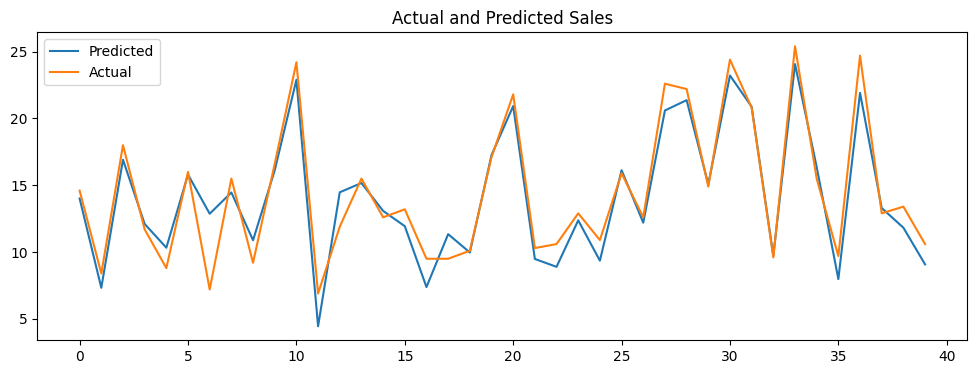

In [211]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

In [172]:
# Prediction on new data
new = pd.DataFrame({'TV': [110], 'Radio': [63], 'Newspaper': [80]})
new_pred = model.predict(new)
print("Predicted Sales:", new_pred)

Predicted Sales: [20.09941177]


### Conclusion
* In this task, I have used the Advertising Dataset to predict sales based on TV, Radio, and Newspaper advertising budgets.
* I performed an analysis and visualization of the dataset to understand the relationships between features.
* I trained the model using the Linear Regression Algorithm and achieved an R-squared value of 0.91, indicating high accuracy.
* A dataframe of actual and predicted values was created, demonstrating the model's effectiveness.
* Finally, I visualized the actual and predicted sales values, showing a close match and confirming the model's reliability.